# Import libraries and Dataset

In [2]:
import duckdb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
con = duckdb.connect("../warehouse/online_retail.duckdb")
df = con.execute("SELECT * FROM online_retail").df()

In [4]:
df.head(5)

,id_invoice,code_stock,name,quantity,invoice_date,price_per_unit,id_customer,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,UK
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,UK
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,UK
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,UK
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,UK


# Visualize dataset

In [6]:
df.tail(2)
# half million records

,id_invoice,code_stock,name,quantity,invoice_date,price_per_unit,id_customer,country
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


In [7]:
df.info()
# 8 features
# null records in name, id_customer
# id_customer must be object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_invoice      541909 non-null  object 
 1   code_stock      541909 non-null  object 
 2   name            540455 non-null  object 
 3   quantity        541909 non-null  int64  
 4   invoice_date    541909 non-null  object 
 5   price_per_unit  541909 non-null  float64
 6   id_customer     406829 non-null  float64
 7   country         541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.describe()

,quantity,price_per_unit,id_customer
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Cleaning and Exploration

In [10]:
# clean or analize null values
# id_customer to object
# negative values in quantity and price_per_unit

### Duplicated values

In [12]:
df.duplicated().sum()

5268

In [13]:
duplicates = df[df.duplicated()]
duplicates.value_counts().head(10)
# Ten most duplicated records

id_invoice  code_stock  name                                 quantity  invoice_date      price_per_unit  id_customer  country
555524      22698       PINK REGENCY TEACUP AND SAUCER       1         05-06-2011 11:37  2.95            16923.0      UK         19
            22697       GREEN REGENCY TEACUP AND SAUCER      1         05-06-2011 11:37  2.95            16923.0      UK         11
572861      22775       PURPLE DRAWERKNOB ACRYLIC EDWARDIAN  12        26-10-2011 12:46  1.25            14102.0      UK          7
572344      M           Manual                               48        24-10-2011 10:43  1.50            14607.0      UK          5
540524      21756       BATH BUILDING BLOCK WORD             1         09-01-2011 12:53  5.95            16735.0      UK          5
541266      21754       HOME BUILDING BLOCK WORD             1         16-01-2011 16:25  5.95            15673.0      UK          5
            21755       LOVE BUILDING BLOCK WORD             1         16-01-2011 

In [14]:
df[df.duplicated()].head(5)

,id_invoice,code_stock,name,quantity,invoice_date,price_per_unit,id_customer,country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01-12-2010 11:45,1.25,17908.0,UK
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,01-12-2010 11:45,2.10,17908.0,UK
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,01-12-2010 11:45,2.95,17908.0,UK
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,01-12-2010 11:45,4.95,17908.0,UK
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,01-12-2010 11:49,2.95,17920.0,UK


In [15]:
# Lets drop duplicated records for better analysis
df.drop_duplicates(inplace=True)

### Null values

<Axes: >

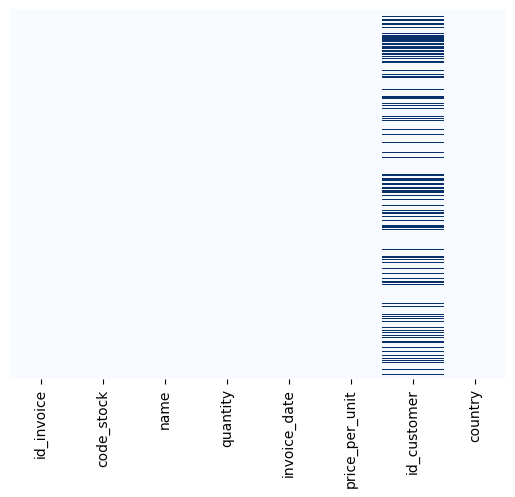

In [17]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [18]:
# let see null values in id_customer
df[df['id_customer'].isna()].sample(5)

,id_invoice,code_stock,name,quantity,invoice_date,price_per_unit,id_customer,country
515377,579777,21790,VINTAGE SNAP CARDS,10,30-11-2011 15:13,1.63,NaN,UK
204867,554694,82582,AREA PATROLLED METAL SIGN,1,25-05-2011 17:06,4.13,NaN,UK
324231,565396,22561,WOODEN SCHOOL COLOURING SET,1,02-09-2011 16:39,3.29,NaN,UK
235503,557641,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,6,21-06-2011 16:35,4.13,NaN,UK
387091,570258,82484,WOOD BLACK BOARD ANT WHITE FINISH,1,10-10-2011 09:56,16.63,NaN,UK


In [19]:
# id_customer to object
df['id_customer'] = df['id_customer'].astype('Int64').astype('object')
df

,id_invoice,code_stock,name,quantity,invoice_date,price_per_unit,id_customer,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,UK
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,UK
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,UK
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,UK
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,UK
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680,France


In [20]:
# id_customer drop null values
df.dropna(subset=['id_customer'], inplace=True)
df.head()

,id_invoice,code_stock,name,quantity,invoice_date,price_per_unit,id_customer,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,UK
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,UK
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,UK
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,UK
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,UK


In [21]:
# id_customer null values to "unknown"
# df['id_customer'] = df['id_customer'].fillna('Unknown')
# df.head(2)

### Negative values

In [23]:
# Lets check how many negative values exist in 'quantity'
(df['quantity'] < 0).sum()

8872

In [24]:
df[df['quantity'] < 0].head()
# we keep negative values for future analysis

,id_invoice,code_stock,name,quantity,invoice_date,price_per_unit,id_customer,country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527,UK
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311,UK
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548,UK
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548,UK
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548,UK


In [25]:
# Lets check how many negative values exist in 'price_per_unit'
(df['price_per_unit'] < 0).sum()

0

In [26]:
df[df['price_per_unit'] < 0].head()

,id_invoice,code_stock,name,quantity,invoice_date,price_per_unit,id_customer,country


In [27]:
# Drop two negative values in price_per_unit
df = df[df['price_per_unit'] >= 0]

In [28]:
df.describe()

,quantity,price_per_unit
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


### Outliers distribution

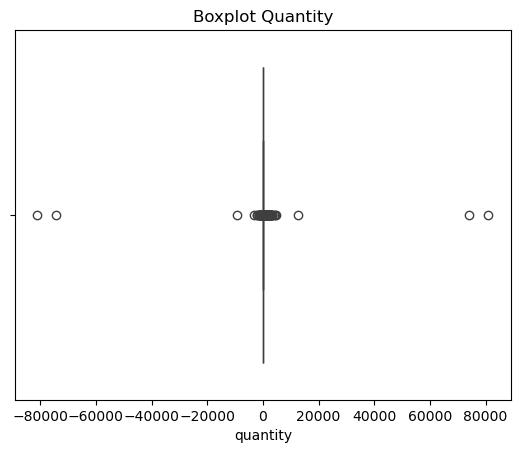

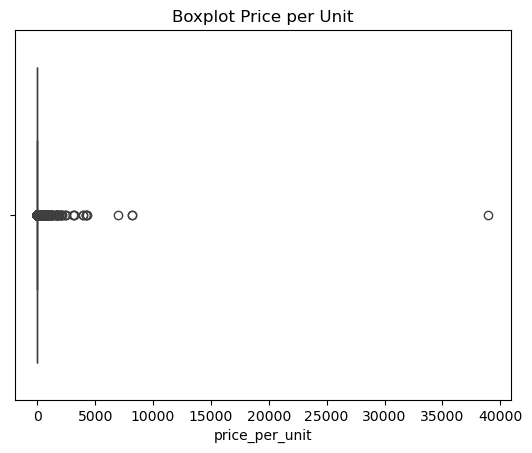

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for 'quantity'
sns.boxplot(x=df['quantity'])
plt.title('Boxplot Quantity')
plt.show()

# Boxplot for 'price_per_unit'
sns.boxplot(x=df['price_per_unit'])
plt.title('Boxplot Price per Unit')
plt.show()

In [31]:
# Lets see theese outliers
df[df['price_per_unit'] > 25000].head()
# quantity is negative here

,id_invoice,code_stock,name,quantity,invoice_date,price_per_unit,id_customer,country
222681,C556445,M,Manual,-1,10-06-2011 15:31,38970.0,15098,UK


In [32]:
df[df['quantity'] > 60000].head()

,id_invoice,code_stock,name,quantity,invoice_date,price_per_unit,id_customer,country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,18-01-2011 10:01,1.04,12346,UK
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,09-12-2011 09:15,2.08,16446,UK


In [33]:
df[df['quantity'] < -60000].head()

,id_invoice,code_stock,name,quantity,invoice_date,price_per_unit,id_customer,country
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,18-01-2011 10:17,1.04,12346,UK
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,09-12-2011 09:27,2.08,16446,UK


### Drop outliers

In [35]:
# DROP OUTLIERS BECAUSE ANALYSIS WILL BE AFFECTED
df = df[(df['quantity'] > -60000) & (df['quantity'] < 60000) & (df['price_per_unit'] < 25000)]

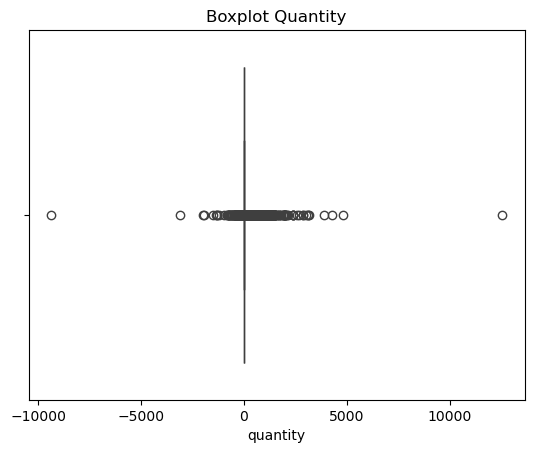

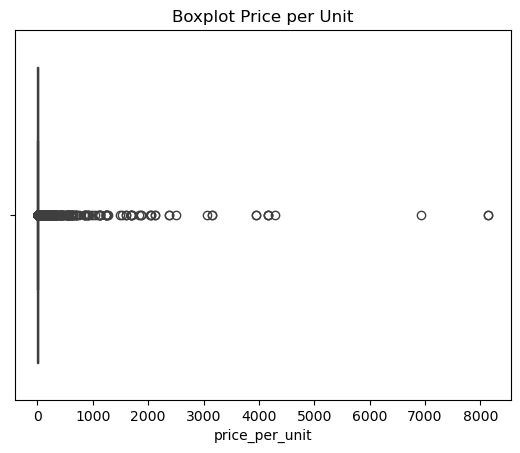

In [36]:
# Boxplot for 'quantity'
sns.boxplot(x=df['quantity'])
plt.title('Boxplot Quantity')
plt.show()

# Boxplot for 'price_per_unit'
sns.boxplot(x=df['price_per_unit'])
plt.title('Boxplot Price per Unit')
plt.show()

### invoice_date format revision

In [38]:
df[df['invoice_date'].isna()]
# There are no null values in invoice_date, but it still being 'object' so lets continue

,id_invoice,code_stock,name,quantity,invoice_date,price_per_unit,id_customer,country


In [39]:
df['invoice_date'].unique()[:2000]
# It seems that the dates follow the same format

array(['01-12-2010 08:26', '01-12-2010 08:28', '01-12-2010 08:34', ...,
       '13-01-2011 12:53', '13-01-2011 12:56', '13-01-2011 13:21'],
      dtype=object)

In [40]:
df['invoice_date'].str.len().value_counts()
# All values have 16 characters... good

invoice_date
16    401599
Name: count, dtype: int64

In [41]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d-%m-%Y %H:%M', errors='coerce')

In [42]:
print(df['invoice_date'].isna().sum())  # is = 0 so the transformation was excellent.

0


### Country edition (EIRE)

In [44]:
df['country'] = df['country'].replace('EIRE', 'Ireland')

In [45]:
# Negative values in 'quantity' are returns, lets divide the datasets future analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401599 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id_invoice      401599 non-null  object        
 1   code_stock      401599 non-null  object        
 2   name            401599 non-null  object        
 3   quantity        401599 non-null  int64         
 4   invoice_date    401599 non-null  datetime64[ns]
 5   price_per_unit  401599 non-null  float64       
 6   id_customer     401599 non-null  object        
 7   country         401599 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.6+ MB


In [46]:
df[df['quantity'] == 0].head() # there are no values with quantity

,id_invoice,code_stock,name,quantity,invoice_date,price_per_unit,id_customer,country


In [47]:
# ONE FOR THE ORIGINAL WITHOUT RETURNS AND ONE FOR THE RETURNS
df_returns = df[df['quantity'] < 0].copy()
df_sales = df[df['quantity'] >= 0].copy()

In [48]:
df[df['quantity'] < 0].count()

id_invoice        8869
code_stock        8869
name              8869
quantity          8869
invoice_date      8869
price_per_unit    8869
id_customer       8869
country           8869
dtype: int64

### Last check

In [50]:
df_returns.describe()

,quantity,invoice_date,price_per_unit
count,8869.000000,8869,8869.000000
mean,-13.284925,2011-06-27 09:07:58.701093632,14.511597
min,-9360.000000,2010-12-01 09:41:00,0.010000
25%,-6.000000,2011-03-23 12:11:00,1.450000
50%,-2.000000,2011-07-11 13:51:00,2.950000
75%,-1.000000,2011-10-06 20:36:00,4.950000
max,-1.000000,2011-12-09 11:58:00,8142.750000
std,120.629120,NaN,164.793514


In [51]:
df_sales.describe()

,quantity,invoice_date,price_per_unit
count,392730.000000,392730,392730.000000
mean,12.758577,2011-07-10 19:15:29.372698880,3.125604
min,1.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000
50%,6.000000,2011-07-31 12:02:00,1.950000
75%,12.000000,2011-10-20 12:53:00,3.750000
max,12540.000000,2011-12-09 12:50:00,8142.750000
std,47.497897,NaN,22.240782


In [52]:
df_sales.describe(include='object')

,id_invoice,code_stock,name,id_customer,country
count,392730,392730,392730,392730,392730
unique,18534,3664,3876,4338,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841,UK
freq,542,2023,2016,7676,349225


# Exploratory Data Analysis

In [54]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392730 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id_invoice      392730 non-null  object        
 1   code_stock      392730 non-null  object        
 2   name            392730 non-null  object        
 3   quantity        392730 non-null  int64         
 4   invoice_date    392730 non-null  datetime64[ns]
 5   price_per_unit  392730 non-null  float64       
 6   id_customer     392730 non-null  object        
 7   country         392730 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.0+ MB


### Distribution of Variables

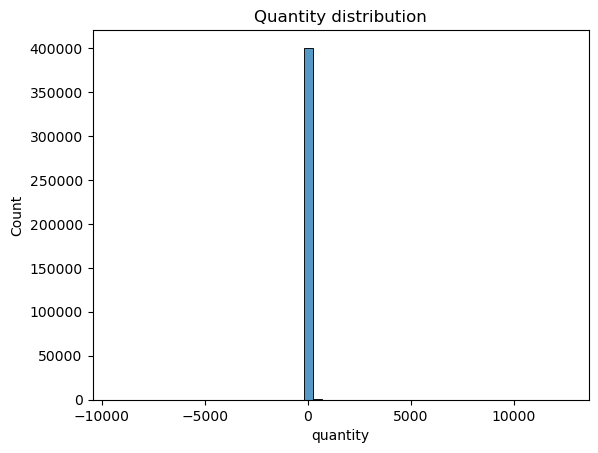

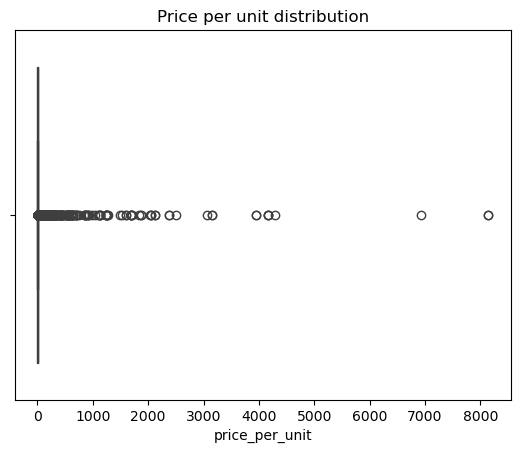

In [56]:
# Distribution of variables

# quantity
sns.histplot(df['quantity'], bins=50)
plt.title('Quantity distribution')
plt.show()

# price_per_unit
sns.boxplot(x=df['price_per_unit'])
plt.title('Price per unit distribution')
plt.show()

### Top products and customers

In [58]:
# Best selling products
df_sales.groupby('name')['quantity'].sum().sort_values(ascending=False).head(10)

name
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
PACK OF 12 LONDON TISSUES             25329
PACK OF 60 PINK PAISLEY CAKE CASES    24230
Name: quantity, dtype: int64

In [59]:
# Best customers
df.groupby('id_customer')['quantity'].sum().sort_values(ascending=False).head(10)

id_customer
14646    196719
12415     77242
14911     77155
17450     69009
18102     64122
17511     63012
13694     61899
14298     58021
14156     56908
16684     49390
Name: quantity, dtype: int64

### Additional variables

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401599 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id_invoice      401599 non-null  object        
 1   code_stock      401599 non-null  object        
 2   name            401599 non-null  object        
 3   quantity        401599 non-null  int64         
 4   invoice_date    401599 non-null  datetime64[ns]
 5   price_per_unit  401599 non-null  float64       
 6   id_customer     401599 non-null  object        
 7   country         401599 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.6+ MB


In [62]:
# Creation of additional variables
df['total_income'] = df['quantity'] * df['price_per_unit']

In [63]:
df['invoice_month'] = df['invoice_date'].dt.to_period('M')

In [64]:
# Columnn with number of month (1 to 12)
df['month'] = df['invoice_date'].dt.month

In [65]:
# Column with number of weekday (1 = Monday, 7 = Sunday)
df['weekday'] = df['invoice_date'].dt.weekday + 1

In [66]:
# Column with hour (0 to 23)
df['hour'] = df['invoice_date'].dt.hour

In [67]:
# Lets see the results
df[['invoice_date', 'month', 'weekday', 'hour']].head()

,invoice_date,month,weekday,hour
0,2010-12-01 08:26:00,12,3,8
1,2010-12-01 08:26:00,12,3,8
2,2010-12-01 08:26:00,12,3,8
3,2010-12-01 08:26:00,12,3,8
4,2010-12-01 08:26:00,12,3,8


In [68]:
df.head()

,id_invoice,code_stock,name,quantity,invoice_date,price_per_unit,id_customer,country,total_income,invoice_month,month,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,UK,15.30,2010-12,12,3,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,UK,20.34,2010-12,12,3,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,UK,22.00,2010-12,12,3,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,UK,20.34,2010-12,12,3,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,UK,20.34,2010-12,12,3,8


In [69]:
df[df['invoice_date'].isna()]
# There are no null values. Excellent

,id_invoice,code_stock,name,quantity,invoice_date,price_per_unit,id_customer,country,total_income,invoice_month,month,weekday,hour


### Temporal analysis

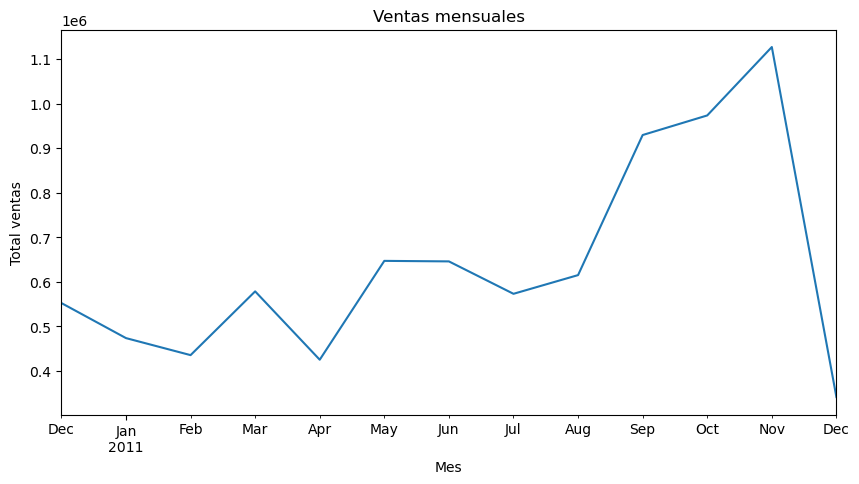

In [71]:
# Ventas por mes
df.groupby('invoice_month')['total_income'].sum().plot(kind='line', figsize=(10,5))
plt.title('Ventas mensuales')
plt.xlabel('Mes')
plt.ylabel('Total ventas')
plt.show()

### Top countries

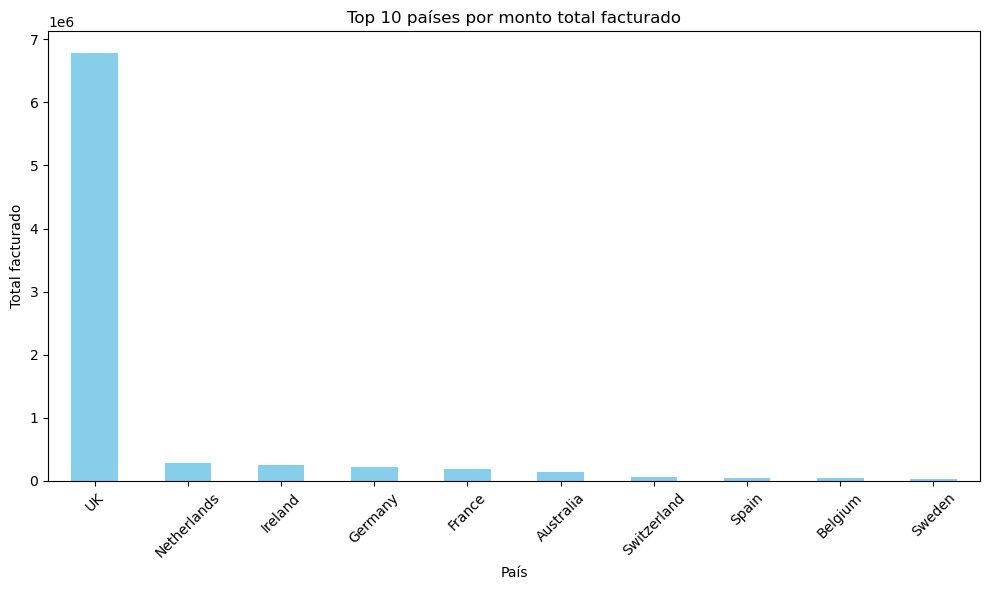

In [73]:
# Group by y and sum total_income by country
total_by_country = df.groupby('country')['total_income'].sum().sort_values(ascending=False).head(10)

# Graph
total_by_country.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 países por monto total facturado')
plt.ylabel('Total facturado')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Correlations

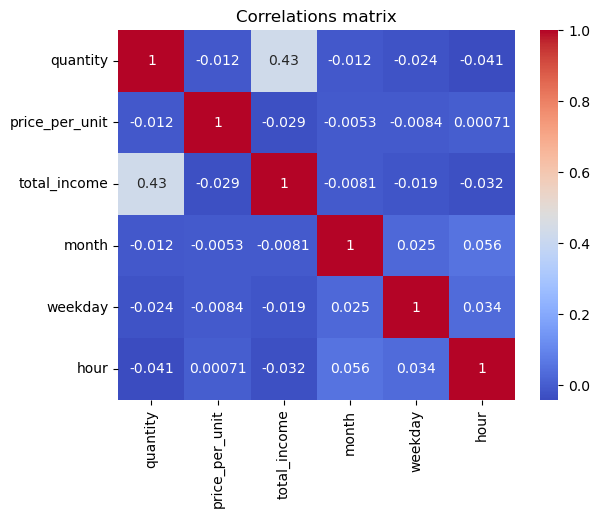

In [75]:
# Correlations
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlations matrix')
plt.show()

### Last graphs

### Split dataset

In [78]:
# For only sales
df_sales = df[df['quantity'] >= 0].copy()

In [79]:
# For only returns
df_returns = df[df['quantity'] < 0].copy()

In [80]:
df_sales.head()

,id_invoice,code_stock,name,quantity,invoice_date,price_per_unit,id_customer,country,total_income,invoice_month,month,weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,UK,15.30,2010-12,12,3,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,UK,20.34,2010-12,12,3,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,UK,22.00,2010-12,12,3,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,UK,20.34,2010-12,12,3,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,UK,20.34,2010-12,12,3,8


In [81]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392730 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id_invoice      392730 non-null  object        
 1   code_stock      392730 non-null  object        
 2   name            392730 non-null  object        
 3   quantity        392730 non-null  int64         
 4   invoice_date    392730 non-null  datetime64[ns]
 5   price_per_unit  392730 non-null  float64       
 6   id_customer     392730 non-null  object        
 7   country         392730 non-null  object        
 8   total_income    392730 non-null  float64       
 9   invoice_month   392730 non-null  period[M]     
 10  month           392730 non-null  int32         
 11  weekday         392730 non-null  int32         
 12  hour            392730 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(5), period[M](1)
memory usage: 37

In [82]:
df_returns.head()

,id_invoice,code_stock,name,quantity,invoice_date,price_per_unit,id_customer,country,total_income,invoice_month,month,weekday,hour
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,UK,-27.50,2010-12,12,3,9
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,UK,-4.65,2010-12,12,3,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,UK,-19.80,2010-12,12,3,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,UK,-6.96,2010-12,12,3,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,UK,-6.96,2010-12,12,3,10


In [83]:
df_sales.shape

(392730, 13)

In [84]:
df_returns.shape

(8869, 13)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401599 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id_invoice      401599 non-null  object        
 1   code_stock      401599 non-null  object        
 2   name            401599 non-null  object        
 3   quantity        401599 non-null  int64         
 4   invoice_date    401599 non-null  datetime64[ns]
 5   price_per_unit  401599 non-null  float64       
 6   id_customer     401599 non-null  object        
 7   country         401599 non-null  object        
 8   total_income    401599 non-null  float64       
 9   invoice_month   401599 non-null  period[M]     
 10  month           401599 non-null  int32         
 11  weekday         401599 non-null  int32         
 12  hour            401599 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(5), period[M](1)
memory usage: 38

In [86]:
df.describe()

,quantity,invoice_date,price_per_unit,total_income,month,weekday,hour
count,401599.000000,401599,401599.000000,401599.000000,401599.000000,401599.000000,401599.000000
mean,12.183427,2011-07-10 12:08:39.394072320,3.377054,20.710932,7.595422,3.598809,12.731058
min,-9360.000000,2010-12-01 08:26:00,0.000000,-8322.120000,1.000000,1.000000,6.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,4.250000,5.000000,2.000000,11.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,11.700000,8.000000,3.000000,13.000000
75%,12.000000,2011-10-20 11:58:00,3.750000,19.800000,11.000000,5.000000,14.000000
max,12540.000000,2011-12-09 12:50:00,8142.750000,38970.000000,12.000000,7.000000,20.000000
std,50.420191,NaN,32.957563,102.011787,3.417425,1.917508,2.288199


# Final Datasets

In [88]:
# for df

import os

# From notebooks/transform.ipynb to data/
export_path = '../data'
os.makedirs(export_path, exist_ok=True)  # if it doesn't exist

df.to_csv(os.path.join(export_path, 'df.csv'), index=False)

In [89]:
# for df_sales

# From notebooks/transform.ipynb to data/
export_path = '../data'
os.makedirs(export_path, exist_ok=True)  # if it doesn't exist

df_sales.to_csv(os.path.join(export_path, 'df_sales.csv'), index=False)

In [90]:
# for df_returns

# From notebooks/transform.ipynb to data/
export_path = '../data'
os.makedirs(export_path, exist_ok=True)  # if it doesn't exist

df_returns.to_csv(os.path.join(export_path, 'df_returns.csv'), index=False)

# Summary

Key findings from the EDA:

**Revenue Distribution:** Exists a large variance in total_income, with some transactions making significant outliers. Median revenue is correct, indicating that most orders are of low to mid value.

**Product Sales:** The quantity field ranges from -9600 to 12540, here is potential issue (e.g., returns? or errors) that should be handle with care.

**Sales by Time:** 'month', 'weekday' and 'hour' will help to understand when customers buy the most or peak hours.

**Customer and Region Analysis:** 'country' and 'id_customer' fields allow for deep segmentation for the revenue by region and customer behavior.

**Missing Data:** 'name' field has about 1400 missing values (0.3%), which I must take in mind in the report.

Based on this last outputs from EDA, the dashboard will focus on three main pillars: 
- *Revenue Performance*
- *Customer Segments*
- *Sales Behavior Over Time*